In [97]:
# Import files
import pandas as pd
from datetime import datetime, timedelta
import multiprocessing as mp
from functools import partial
import csv
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import time
import multiprocessing as mp
from functools import partial
import copy
from decimal import Decimal
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statistics

from datetime import timedelta, datetime
import timeit
from functools import partial, reduce
from sklearn import preprocessing # normalize the data
import math
from math import ceil

In [2]:
# Identidy users who purchased not who did not purchase
file = 'C:/Users/Tenyu/Desktop/JOB/pg_game_homework/'

df_A = pd.read_csv(file + 'spendevents.csv')
df_B = pd.read_csv(file + 'iaps.csv')

df = pd.merge(df_A, df_B, on=['user_id', 'ts'], how='outer')

id_purchase = []
id_no_purchase = []
for k in list(df['user_id'].unique()):
    a = 'IAP' in list(df[df['user_id'] == k]['spendtype'])
    if a == True:
        id_purchase.append(k)
    else:
        id_no_purchase.append(k)

id_purchase.head()

[1992,
 5704,
 7991,
 6816,
 18961,
 17210,
 5104,
 8578,
 16008,
 8426,
 11089,
 12019,
 11187,
 20352,
 10416,
 19853,
 10096,
 10350,
 12189,
 21675,
 21408,
 21409,
 10846,
 10426,
 16090,
 5644,
 2885,
 6433,
 19216,
 17784,
 9857,
 13907,
 14684,
 21283,
 11953,
 8542,
 15278,
 5858,
 20618,
 18193,
 18013,
 18970,
 19869,
 19574,
 13117,
 6849,
 14545,
 2155,
 11101,
 12956,
 15424,
 17310,
 20635,
 21312,
 20915,
 19777,
 13958,
 2419,
 7453,
 1424,
 10359,
 5976,
 6062,
 1517,
 10395,
 18261,
 19248,
 15048,
 19842,
 7723,
 1429,
 3125,
 15101,
 509,
 1111,
 8613,
 14920,
 5475,
 185,
 6146,
 7095,
 9594,
 16368,
 22338,
 8914,
 6598,
 15040,
 20917,
 20284,
 15787,
 19235,
 13199,
 7067,
 293,
 10934,
 6812,
 13525,
 15827,
 14888,
 5238,
 21240,
 9984,
 18768,
 10337,
 9964,
 13466,
 5532,
 21258,
 245,
 1548,
 3402,
 16324,
 9916,
 7745,
 704,
 1365,
 21667,
 9187,
 12240,
 584,
 4511,
 17802,
 15587,
 17652,
 10330,
 15572,
 11282,
 16762,
 6388,
 18029,
 8299,
 16576,
 11

In [166]:
print(len(id_purchase), len(id_no_purchase))
df.head()

1181 16887


,user_id,ts,date_x,story,chapter,spendtype,currency,amount,date_y,prod_name,prod_type,rev
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0.0,earnGemsCounter,gems,-22.0,NaN,NaN,NaN,NaN
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0.0,earnGemsCounter,gems,-22.0,NaN,NaN,NaN,NaN
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0.0,earnGemsCounter,gems,-22.0,NaN,NaN,NaN,NaN
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0.0,earnGemsCounter,gems,-22.0,NaN,NaN,NaN,NaN
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0.0,earnGemsCounter,gems,-22.0,NaN,NaN,NaN,NaN


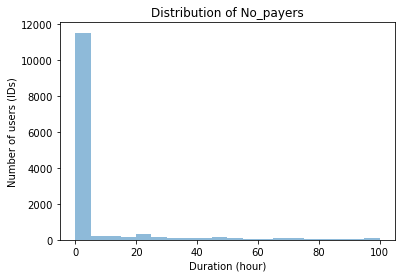

0.0 106.54 16887


In [163]:
# Analysis of no payers (1): Distribution
no_pay_interval = []
for idd in id_no_purchase:
    test = df[df['user_id'] == idd]
    min_t = pd.to_datetime(test['ts'].min())
    max_t = pd.to_datetime(test['ts'].max())
    diff = max_t - min_t
    diff_h = round(diff.total_seconds()/3600, 2)
    no_pay_interval.append(diff_h)

# fixed bin size
plt.hist(no_pay_interval, bins=np.arange(0, 101, 5), alpha=0.5)
plt.title('Distribution of No_payers')
plt.xlabel('Duration (hour)')
plt.ylabel('Number of users (IDs)')
plt.show()


# median
median = round(statistics.median(no_pay_interval), 2)

# average
n_1 = len(no_pay_interval)
  
get_sum = sum(no_pay_interval)
mean = round(get_sum / n_1, 2)
print(median, mean, n_1)

In [152]:
# Analysis of no payers (2): attribute
no_pay_diff = []
for idd in id_no_purchase:
    test = df[df['user_id'] == idd]
    min_t = pd.to_datetime(test['ts'].min())
    max_t = pd.to_datetime(test['ts'].max())
    diff = max_t - min_t
    diff_h = round(diff.total_seconds()/3600, 2)
    no_pay_diff.append(diff_h)

data_no_pay = pd.DataFrame(data= {'user_id': id_no_purchase, 'diff_t': no_pay_diff})
df_C = pd.read_csv(file + 'users.csv')
data_all_nopay = pd.merge(data_no_pay, df_C, on=['user_id'], how='inner')

nopay_country =data_all_nopay.groupby('country')['diff_t'].agg(['count','mean', 'median']).reset_index().sort_values(by = 'count', ascending=False)
nopay_country

,country,count,mean,median
150,US,8644,108.729295,0.00
53,GB,1882,126.369979,0.00
29,CA,762,114.051706,0.00
11,AU,664,108.752861,0.00
119,PH,336,138.181875,0.00
...,...,...,...,...
111,NI,1,0.000000,0.00
125,PY,1,0.000000,0.00
131,SC,1,0.000000,0.00
136,SL,1,0.000000,0.00


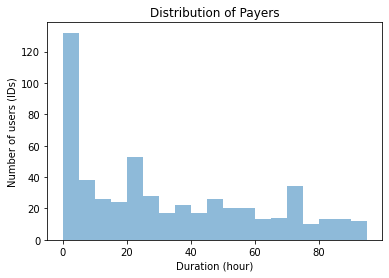

118.16 315.11 1181


In [164]:
# Analysis of payers (1): Distribution

pay_interval = []
for idd in id_purchase:
    test = df[df['user_id'] == idd]
    min_t = pd.to_datetime(test['ts'].min())
    max_t = pd.to_datetime(test['ts'].max())
    diff = max_t - min_t
    diff_h = round(diff.total_seconds()/3600, 2)
    pay_interval.append(diff_h)

# fixed bin size
plt.hist(pay_interval, bins=np.arange(0, 100, 5), alpha=0.5)
plt.title('Distribution of Payers')
plt.xlabel('Duration (hour)')
plt.ylabel('Number of users (IDs)')

plt.show()


# median
median = round(statistics.median(pay_interval), 2)

# average
n_1 = len(pay_interval)
  
get_sum = sum(pay_interval)
mean = round(get_sum / n_1, 2)
print(median, mean, n)

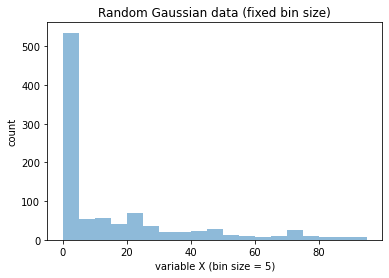

10.01 83.23 1181


In [153]:
# (1) Analysis from first purchase to purchase date: Distribution

login_pay_int = []
for kj in id_purchase:
    test_1 = df[df['user_id'] == kj]
    min_login = pd.to_datetime(test_1['ts'].min())
    min_purchase = pd.to_datetime(test_1[test_1['spendtype'] == 'IAP']['ts'].min())
    diff_1 = min_purchase - min_login
    diff_1 = round(diff_1.total_seconds()/3600, 2)
    login_pay_int.append(diff_1)
    
# fixed bin size
plt.hist(login_pay_int, bins=np.arange(0, 100, 5), alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

# median
median = round(statistics.median(login_pay_int), 2)

# average
n_1 = len(login_pay_int)
  
get_sum = sum(login_pay_int)
mean = round(get_sum / n_1, 2)
print(median, mean, n_1)

In [185]:
# (2) Analysis from first purchase to purchase date: Attribute
pay_diff = []
for kj in id_purchase:
    test_1 = df[df['user_id'] == kj]
    min_login = pd.to_datetime(test_1['ts'].min())
    min_purchase = pd.to_datetime(test_1[test_1['spendtype'] == 'IAP']['ts'].min())
    diff_1 = min_purchase - min_login
    diff_1 = round(diff_1.total_seconds()/3600, 2)
    pay_diff.append(diff_1)

data_pay = pd.DataFrame(data= {'user_id': id_purchase, 'diff_t': pay_diff})
df_C = pd.read_csv(file + 'users.csv')
data_all_pay = pd.merge(data_pay, df_C, on=['user_id'], how='inner')
pay_country = data_all_pay.groupby('country')['diff_t'].agg(['count','mean', 'median']).reset_index().sort_values(by = 'count', ascending=False)


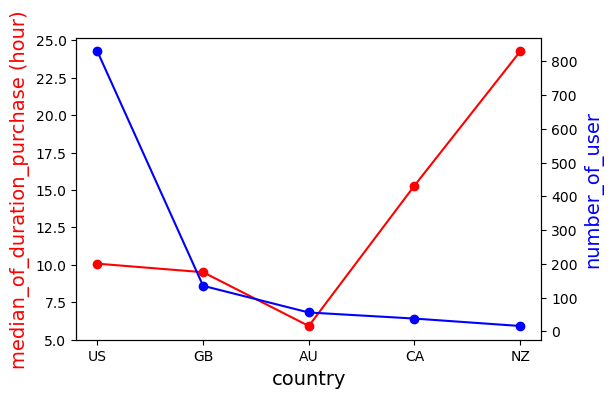

In [186]:
pay_country5 = pay_country.head(5)

fig,ax = plt.subplots(figsize=(6, 4), dpi=100)
# make a plot
ax.plot(pay_country5.country, pay_country5['median'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("country",fontsize=14)
# set y-axis label
ax.set_ylabel("median_of_duration_purchase (hour)",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pay_country5.country, pay_country5["count"],color="blue",marker="o")
ax2.set_ylabel("number_of_user",color="blue",fontsize=14)
plt.show()